# Multivariate Analysis with Seaborn

Multivariate visualizations are an expansion of bivariate analysis, where we add another variable (or variables). Often, adding the third variable helps us to find some important pattern or information that we couldn´t have observed before. 

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace = True)

In [3]:
# Take a look at first 5 rows
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


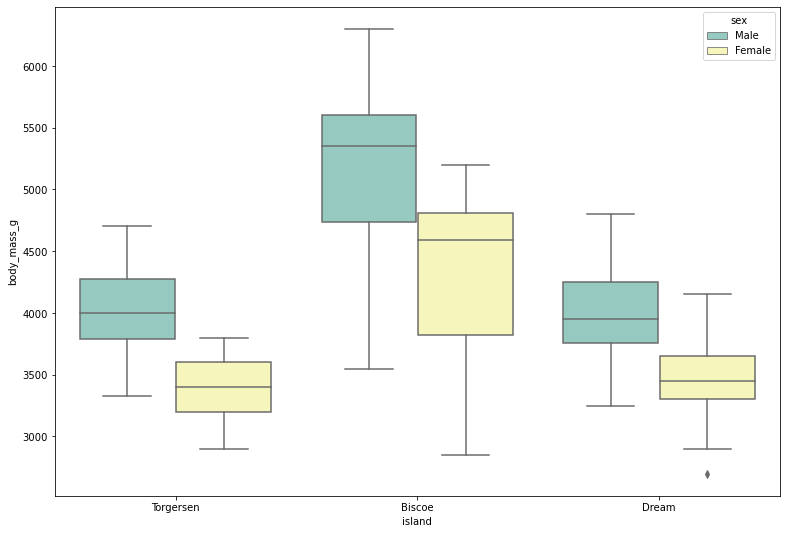

In [4]:
# A boxplot
plt.subplots(figsize = (13,9))
sns.boxplot(data = penguins, x = 'island', 
            y = 'body_mass_g', 
            hue = 'sex', 
            palette = 'Set3');

The above boxplot shows the distribution of penguin´s body mass based on the gender of penguins and an island they inhabit.

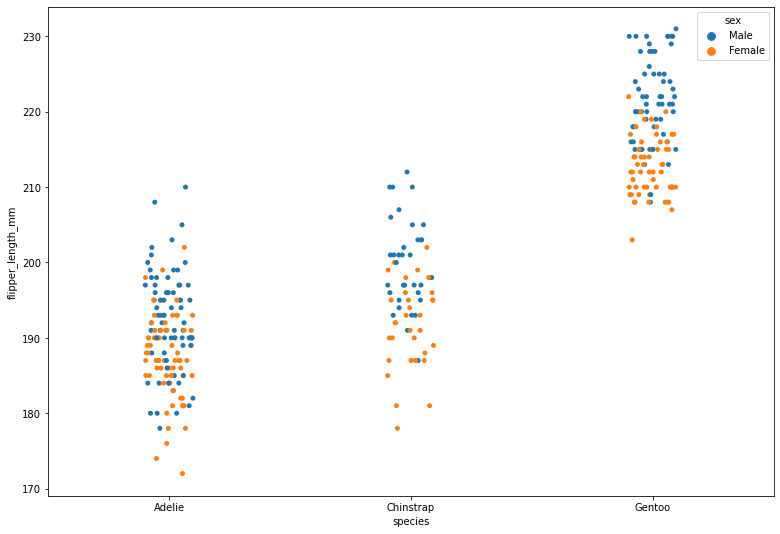

In [5]:
# A stripplot
plt.subplots(figsize = (13,9))
sns.stripplot(data = penguins, x = 'species', 
              y = 'flipper_length_mm', 
              hue ='sex');

Here we can observe the flipper length distribution based on species and the gender of penguins. We can immediately see more of differences or similarities between them thanks to adding a third variable.

# Encoding the third variable 

There are 3 ways how to encode the third variable: color, shape, size

**Encoding with color:**
- in the below example, categorical variable has been encoded using color with `hue` parameter
- this encoding produce different colors fo categories

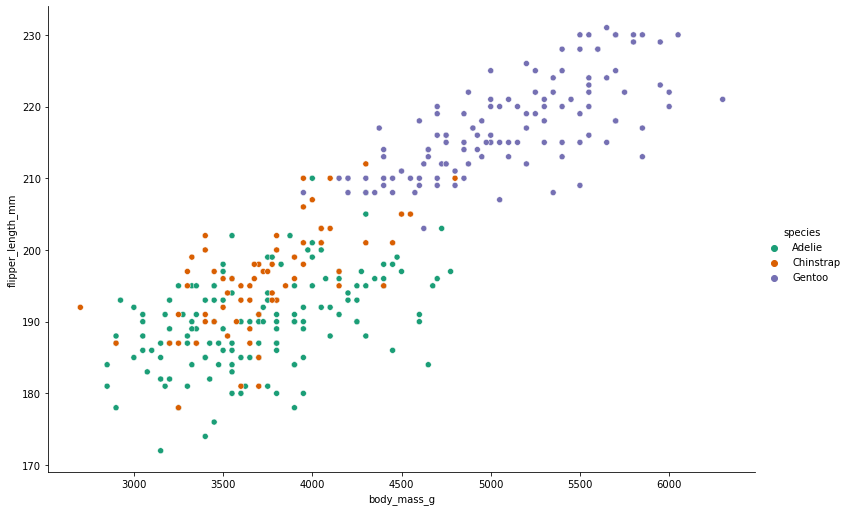

In [19]:
# A scatterplot
sns.relplot(data = penguins, x = 'body_mass_g', 
            y = 'flipper_length_mm', 
            hue = 'species',
            palette = 'Dark2',
            height = 7,
            aspect = 1.5);

**Encoding with size:**
- 

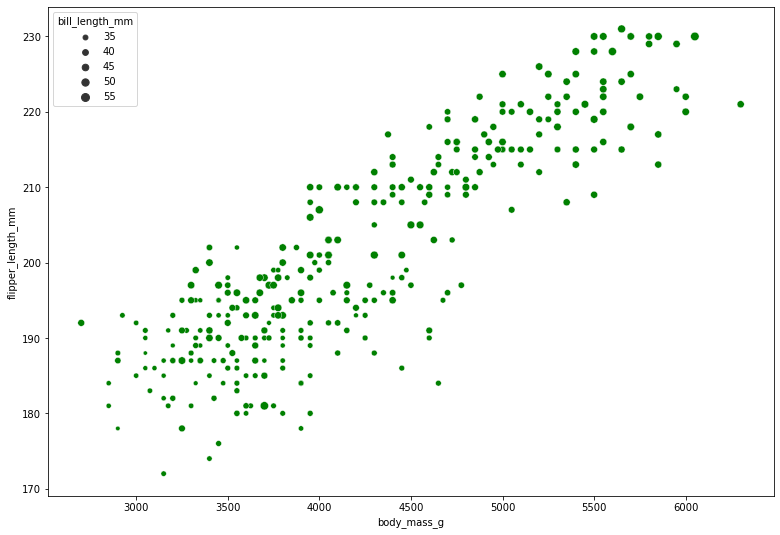

In [27]:
fig, ax = plt.subplots(figsize = (13,9))
sns.scatterplot(data = penguins, x = 'body_mass_g', y = 'flipper_length_mm', 
                size = 'bill_length_mm',
                color = 'green');

**Encoding with markers:**
- we can encode the third categorical variable with `markers` parameter, where we define specific marker for each level

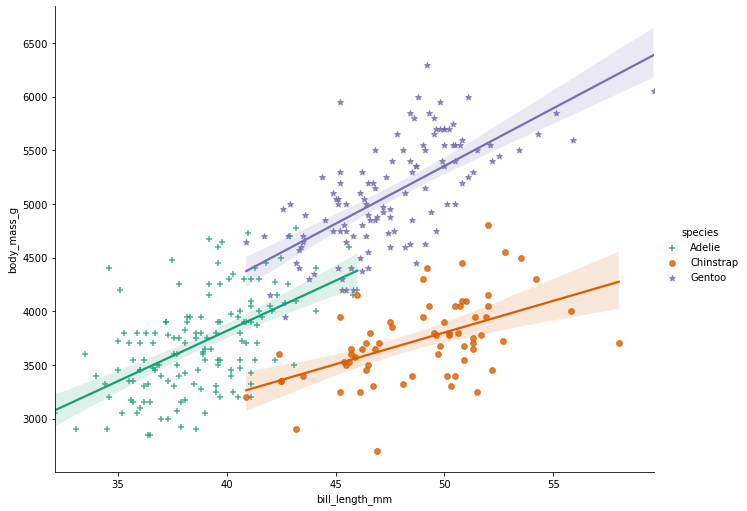

In [45]:
sns.lmplot(data = penguins, x = 'bill_length_mm', y = 'body_mass_g', 
           hue = 'species', 
           markers = ['+','8','*'],
           palette = 'Dark2',
           height = 7,
           aspect = 1.3);

Often, a relationship between variables become more clear when we add variable as 'species' to a simple relplot.

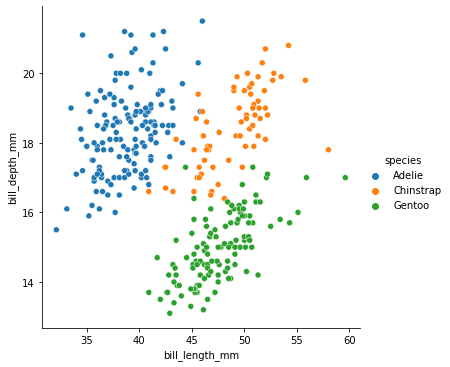

In [7]:
#TASK 
sns.relplot(data = penguins, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species');

##  FacetGrid

Sometimes we want to display a relationship or a distribution not in a single Axes, but create a separate subplots. This can be done using a FacetGrid object where can we specify 3 dimensions:
- row 
- col
- hue - plotting different subset

Let´s say we want to look at the distribution of penguins species, so we assign 'species' to `col` parameter.

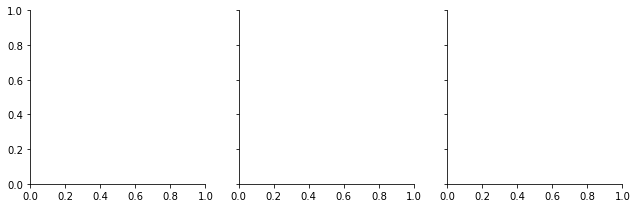

In [46]:
# Initializing a FacetGrid object
g = sns.FacetGrid(penguins, col = 'species')

When we initialized FacetGrid object, a Figure and Axes will be returned. To create some plot we apply `.map()` on a FacetGrid, where we specify plotting function and variables we want to plot.

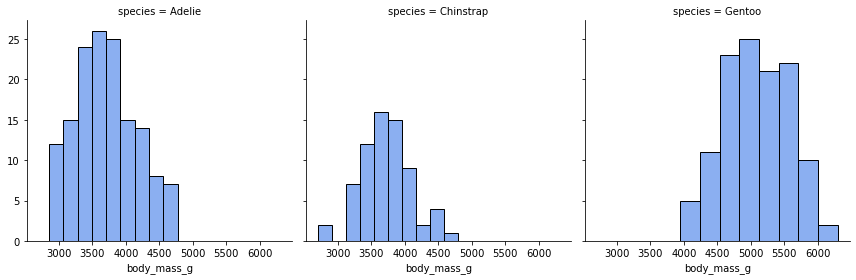

In [55]:
g = sns.FacetGrid(penguins, 
                  col = 'species',
                  height = 4,
                  aspect = 1)
g.map(sns.histplot, 'body_mass_g');

Let´s add the third variable using `row` parameter. We want to see the distribution of body mass also based on species gender. 

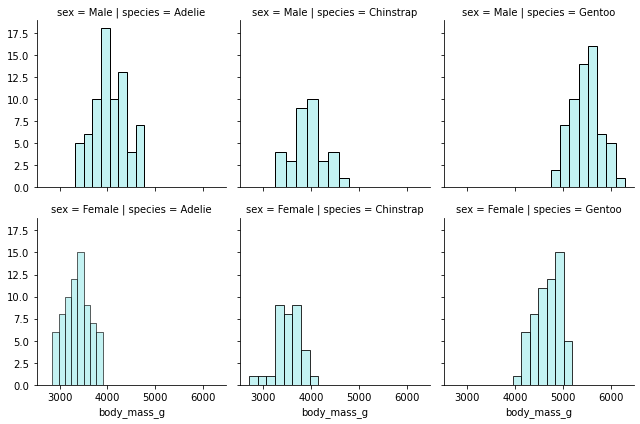

In [61]:
g = sns.FacetGrid(penguins, 
                  col = 'species', 
                  row = 'sex')
g.map(sns.histplot, 'body_mass_g', color = 'paleturquoise');

To visualize a relationship between 2 numerical variables we just add particular variable names. Let´s visualize a relationship between body mass and the flipper lenght based on species. We also add 'sex' variable encoded using color.

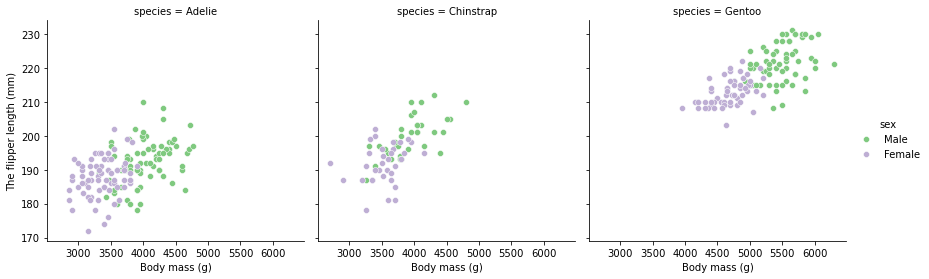

In [82]:
g = sns.FacetGrid(data = penguins, 
                  col = 'species', 
                  hue = 'sex',
                  height = 4,
                  aspect = 1, 
                  palette = 'Accent')
g.map(sns.scatterplot, 'body_mass_g', 'flipper_length_mm')
g.set_axis_labels('Body mass (g)', 'The flipper length (mm)')
g.add_legend();

## PairGrid

Pairwise relationships of variables can be visualized using PairGrid. The initialization of a PairGrid results in a subplot grid with multiple Axes. Then we can call Axes-level plotting functions to draw plots in the upper and lower triangles and the marginal distribution of variables can be drawn along the diagonal. Creation of a PairGrid and a FacetGrid is similar, but the main difference is, that using a FacetGrid you are allowed to use only one specific plotting function that is applied on each subplot. 

Similar result can be accomplished using a high-level interface `pairplot()`, but if you want to have more control of subplot grid, use a PairGrid.

In [11]:
# Defining colors for categories
palette = ['cornflowerblue','lightgreen','gold']
# Setting a palette
sns.set_palette(sns.color_palette(palette))

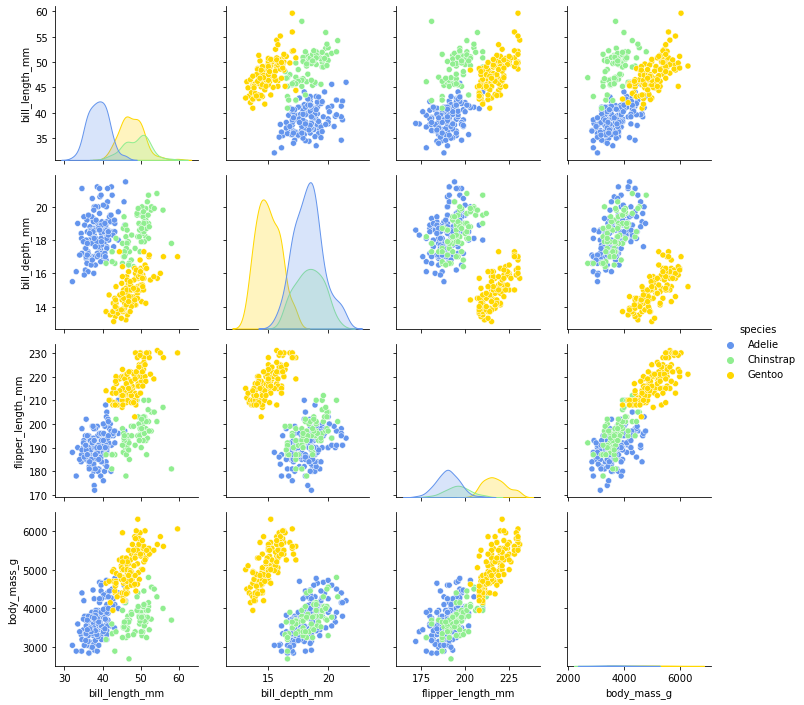

In [88]:
# Initializing a PairGrid
g_grid = sns.PairGrid(penguins, hue = 'species')
# Plotting univariate plot on diagonal subsets
g_grid.map_diag(sns.kdeplot, fill = True)
# Plotting relational plot 
g_grid.map_offdiag(sns.scatterplot)
g_grid.add_legend();